# Implementing Decision tree classifier

In [1]:
# Load the datasets
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Dataset.csv')

In [4]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
df = data.rename({'ALCOHOL CONSUMING':'Alcohol_Consuming','CHRONIC DISEASE':'Chronic_disease','SHORTNESS OF BREATH':'Shortness_of_breath',
          'SWALLOWING DIFFICULTY':'Swallowing_difficulty','CHEST PAIN':'chest_pain','GENDER':'Gender','AGE':'Age','SMOKING':'Smoking',
          'YELLOW_FINGERS':'Yellow_fingers','ANXIETY':'Anxiety','PEER_PRESSURE':'Peer_pressure','FATIGUE ':'Fatigue','ALLERGY ':'Allergy',
          'WHEEZING':'Wheezing','COUGHING':'Coughing','LUNG_CANCER':'Lung_cancer'},axis=1)

In [6]:
df.head()

,Gender,Age,Smoking,Yellow_fingers,Anxiety,Peer_pressure,Chronic_disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_breath,Swallowing_difficulty,chest_pain,Lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
df.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_fingers', 'Anxiety',
       'Peer_pressure', 'Chronic_disease', 'Fatigue', 'Allergy', 'Wheezing',
       'Alcohol_Consuming', 'Coughing', 'Shortness_of_breath',
       'Swallowing_difficulty', 'chest_pain', 'Lung_cancer'],
      dtype='object')

In [8]:
df.describe()

,Age,Smoking,Yellow_fingers,Anxiety,Peer_pressure,Chronic_disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_breath,Swallowing_difficulty,chest_pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [9]:
# Label encode the dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Lung_cancer','Gender']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)
    

In [10]:
df.head()

,Gender,Age,Smoking,Yellow_fingers,Anxiety,Peer_pressure,Chronic_disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_breath,Swallowing_difficulty,chest_pain,Lung_cancer
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [11]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Lung_cancer', axis=1)
#Response variable
Y = df.loc[:,'Lung_cancer']

In [12]:
df

,Gender,Age,Smoking,Yellow_fingers,Anxiety,Peer_pressure,Chronic_disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_breath,Swallowing_difficulty,chest_pain,Lung_cancer
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [13]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=1)
x_ros,y_ros=ros.fit_resample(X,Y)
print("OUR DATASET COUNT         : ", Counter(Y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({1: 270, 0: 39})
OVER SAMPLING DATA COUNT  :  Counter({1: 270, 0: 270})


In [14]:
# split the train and test data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.20, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  432
Number of test dataset     :  108
Total number of dataset    :  540


Decision tree classifier

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree

Train the data

In [19]:

DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predictDTC = DTC.predict(x_test)

Finding the accuracy

In [25]:
accuracy = accuracy_score(y_test, predictDTC)
print("Accuracy of Decision tree classifier:", accuracy *100)

Accuracy of Decision tree classifier: 98.14814814814815


Finding the classification report

In [21]:
cr = classification_report(y_test, predictDTC)
print("Classification report \n\n:", cr)

Classification report 

:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.96      0.98        54

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108



Finding the confusion matrix report

In [24]:
cm = confusion_matrix(y_test, predictDTC)
print("Confusion matrix:/n", cm)

Confusion matrix:/n [[54  0]
 [ 2 52]]


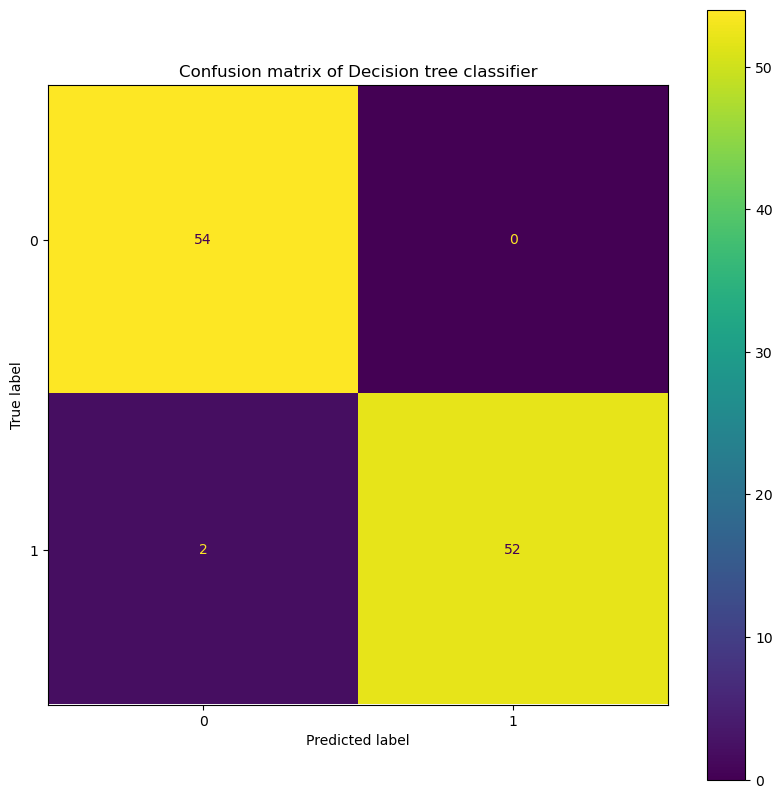

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(DTC, x_test, y_test, ax=ax)
plt.title('Confusion matrix of Decision tree classifier')
plt.show()

In [27]:
import joblib
joblib.dump(DTC,'Dt.pkl')

['Dt.pkl']